In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv 

In [46]:
from cvlib.object_detection import draw_bbox

In [47]:
from numpy.polynomial import Polynomial

In [48]:
image = cv2.imread('images/galpaoTeste1.jpeg')

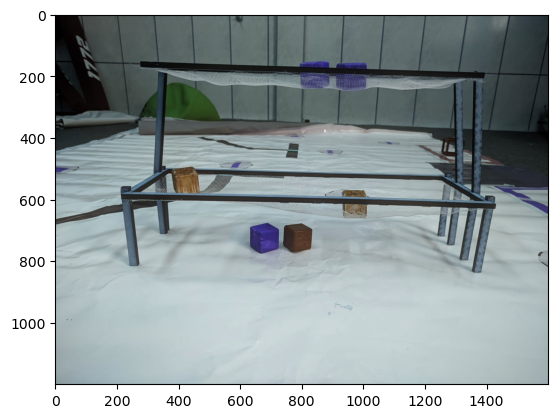

In [49]:
plt.imshow(image)

In [50]:
image = cv2.resize(image, (800, 600))
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [51]:
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)

lower_blue = np.array([90, 80, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)


In [52]:
kernel = np.ones((5, 5), np.uint8)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)
mask_red = cv2.dilate(mask_red, kernel, iterations=1)

mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
mask_blue = cv2.dilate(mask_blue, kernel, iterations=1)

In [53]:
def detectar_cubos(mask, cor, label, min_area=1200):
    global image  # acessa a imagem original para pegar a altura

    altura = image.shape[0]  # altura da imagem
    topo_limite = altura // 3
    meio_limite = 2 * altura // 

    contagem = {'Topo': 0, 'Meio': 0, 'Chão': 0}
    
    contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contorno in contornos:
        area = cv2.contourArea(contorno)
        if area > min_area:
            x, y, w, h = cv2.boundingRect(contorno)
            centro_y = y + h // 2

            if centro_y < topo_limite:
                andar = "Topo"
            elif centro_y < meio_limite:
                andar = "Meio"
            else:
                andar = "Chão"

            contagem[andar] += 1

            texto = f"{label} ({andar})"
            cv2.rectangle(image, (x, y), (x + w, y + h), cor, 2)
            cv2.putText(image, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, cor, 2)

    return contagem


In [54]:
vermelhos = detectar_cubos(mask_blue, (255, 0, 0), "Red Cube", min_area=400)
azuis = detectar_cubos(mask_red, (0, 0, 255), "Blue Cube", min_area=300)

print("RED CUBE:", vermelhos)
print("BLUE CUBE:", azuis)

RED CUBE: {'Topo': 0, 'Meio': 2, 'Chão': 1}
BLUE CUBE: {'Topo': 2, 'Meio': 0, 'Chão': 1}


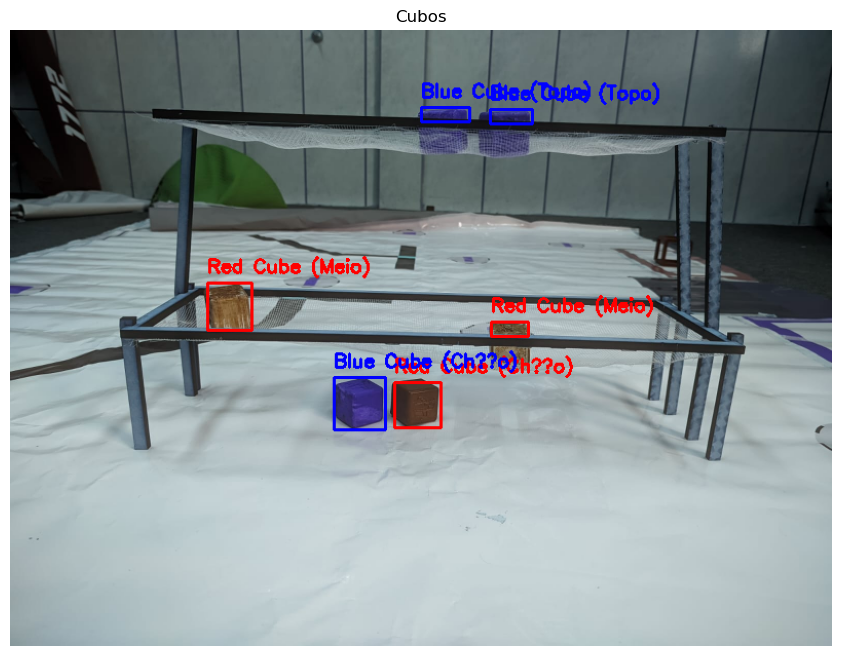

In [55]:
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.title("Cubos")
plt.axis('off')
plt.show()